<a href="https://colab.research.google.com/github/faithrts/AQAADI_Report/blob/main/data/load_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
### importing libraries

# basic libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import json

## Helper functions

In [2]:
def create_histograms(x, title):
  mean = sum(x)/len(x)

  # plots histogram
  plt.hist(x, color="#8ad07c")
  #ax.bar(range_arr, count_arr, width = 5)
  plt.title(title)
  plt.xlabel("Review count")
  plt.ylabel("Novel count")
  plt.axvline(x = mean, color = 'r', linestyle = '-', label = "Mean = " + str(round(mean, 2)))
  plt.legend(loc = "upper right")

  plt.show()

# Importing dataset

In [3]:
# cloning github repo
!git clone https://github.com/luca2618/COMP550_project

Cloning into 'COMP550_project'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 113 (delta 7), reused 8 (delta 2), pack-reused 97
Receiving objects: 100% (113/113), 643.71 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [4]:
# unzipping dataset and saving it in a dataframe
!unzip COMP550_project/data/meta_dataset.csv.zip
!unzip COMP550_project/data/reviews_dataset.csv.zip

meta_df = pd.read_csv('meta_dataset.csv')                       # e.g., user_id, date_published, rating, avg_rating
reviews_df = pd.read_csv('reviews_dataset.csv')                 # just book_id, protagonist (gender), and review text

Archive:  COMP550_project/data/meta_dataset.csv.zip
  inflating: meta_dataset.csv        
Archive:  COMP550_project/data/reviews_dataset.csv.zip
  inflating: reviews_dataset.csv     


In [5]:
# e.g., user_id, date_published, rating, avg_rating
meta_df = pd.read_csv('meta_dataset.csv')

# just book_id, protagonist (gender), and review text
reviews_df = pd.read_csv('reviews_dataset.csv')

# Data overview

In [6]:
### counting genders of protagonists

genders = reviews_df['PROTAGONIST'].values.tolist()

print(f'Female-led: {genders.count("F")}')
print(f'Male-led: {genders.count("M")}')
print(f'Other: {genders.count("V")}')

print(f'\nTotal reviews: {len(genders)}')

Female-led: 206528
Male-led: 82887
Other: 35680

Total reviews: 325095


In [7]:
### counting reviews per novel

reviews_per_novel = {}
all_novels = meta_df['BOOK_TITLE'].values.tolist()
unique_novels = set(all_novels)

# iterates through unique novels
for novel in unique_novels:
  reviews_per_novel[novel] = all_novels.count(novel)

# prints total unique novels and average # of reviews per total
print(f'Total novels: {len(unique_novels)}')
print(f'Average # of reviews per novel: {round(sum(reviews_per_novel.values())/len(unique_novels), 2)}\n')

# prints each novel's review count
for novel in reviews_per_novel:
  print(f'{novel}: {reviews_per_novel[novel]}')

Total novels: 63
Average # of reviews per novel: 5160.24

Before I Fall: 3342
Aristotle and Dante Discover the Secrets of the Universe (Aristotle and Dante Discover the Secrets of the Universe, #1): 4095
Beautiful Creatures (Caster Chronicles, #1): 4033
City of Bones (The Mortal Instruments, #1): 8643
Clockwork Angel (The Infernal Devices, #1): 5017
Hush, Hush (Hush, Hush, #1): 4118
Will Grayson, Will Grayson: 2822
Uglies (Uglies, #1): 3034
Red Queen (Red Queen, #1): 6925
Fallen (Fallen, #1): 3479
Eleanor & Park: 9409
Anna and the French Kiss (Anna and the French Kiss, #1): 5210
Speak: 2391
Holes (Holes, #1): 1436
Thirteen Reasons Why: 5222
Divergent (Divergent, #1): 15782
Delirium (Delirium, #1): 2448
Fangirl: 8199
The Wrath and the Dawn (The Wrath and the Dawn, #1): 3432
Miss Peregrine’s Home for Peculiar Children (Miss Peregrine’s Peculiar Children, #1): 9414
Six of Crows (Six of Crows, #1): 4647
Looking for Alaska: 7200
The Hate U Give: 2966
Obsidian (Lux, #1): 3763
The 5th Wave (T

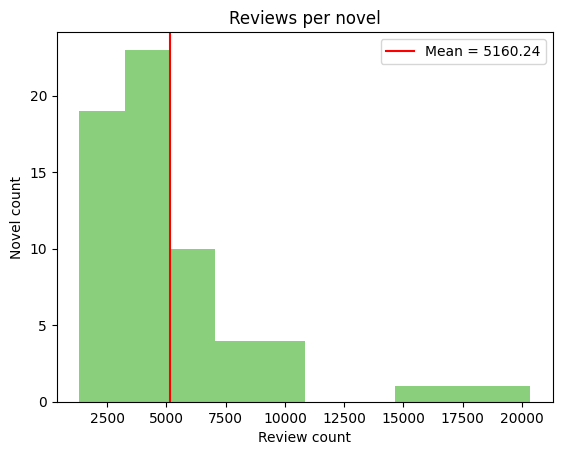

In [8]:
### creating histogram of reviews per novel

create_histograms([reviews_per_novel[key] for key in reviews_per_novel.keys()], 'Reviews per novel')